In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib

%matplotlib inline

# Ambil Data

In [3]:
df = pd.read_csv('dataset/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

<AxesSubplot:xlabel='label', ylabel='count'>

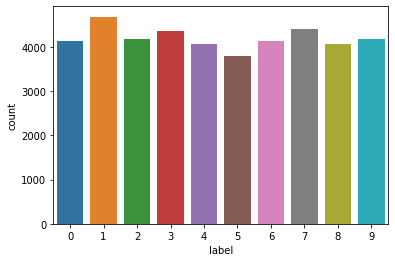

In [5]:
sns.countplot(x='label', data=df)

In [6]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

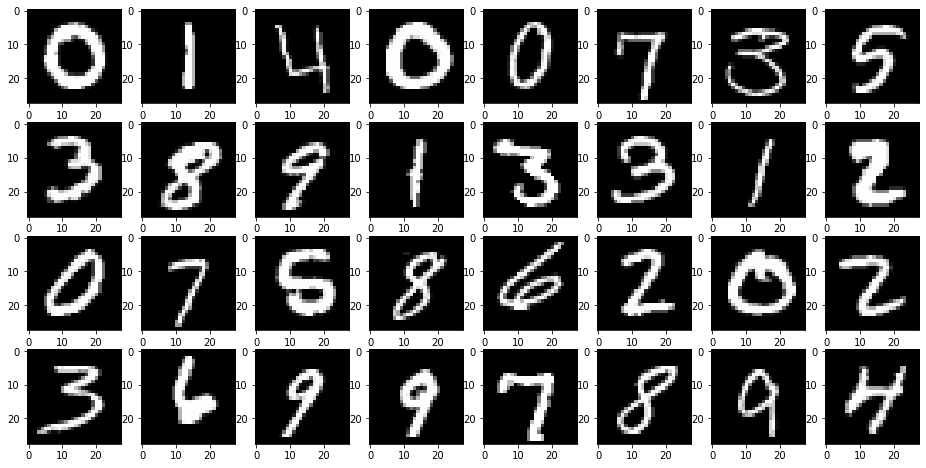

In [7]:
fig = plt.figure(figsize=(16, 8))
columns = 8
rows = 4
for i in range(1, columns*rows +1):
    img = np.array(df.iloc[i, 1:]).reshape((28,28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Cek Null Data 

In [8]:
df.isnull().sum().max()

0

# Cek Duplicated Data 

In [9]:
df.duplicated().any()

False

In [10]:
df.iloc[:, 1:].duplicated().any()

False

# Split Data Prediktor dan Data Target

In [11]:
X_df = df.iloc[:, 1:]
X_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y_df = df.iloc[:, 0:1]
y_df.head()

,label
0,1
1,0
2,1
3,4
4,0


# Mengubah Tipe Data Prediktor Menjadi Float dan Target Menjadi Int

In [13]:
X_df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [14]:
X_df = X_df.astype('float')
X_arr = X_df.to_numpy()
X_arr.dtype

dtype('float64')

In [15]:
y_df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [16]:
y_df = y_df.astype('category')
y_arr = y_df.to_numpy().T[0]
y_arr.dtype

dtype('int64')

# Resizing Gambar

In [17]:
np.sqrt(X_arr.shape[1])

28.0

ukuran gambar telah 28x28 piksel tidak perlu diperkecil lagi

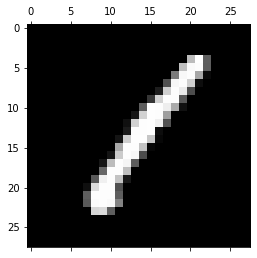

In [18]:
plt.matshow(X_arr[0].reshape((28,28)), cmap='gray', vmin=0, vmax=255)

# Feature Scaling 

In [19]:
scaler = StandardScaler().fit(X_arr)
X_scale = scaler.transform(X_arr)

# Split Data Training dan Data Testing

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y_arr, train_size=0.8, test_size=0.2, random_state=42)

In [21]:
print("Data Training : ", X_train.shape)
print("Data Training : ", y_train.shape)
print("Data Testing : ", X_test.shape)
print("Data Testing : ", y_test.shape)

Data Training :  (33600, 784)
Data Training :  (33600,)
Data Testing :  (8400, 784)
Data Testing :  (8400,)


In [58]:
X_test[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00528064, -0.00687837, -0.00487956,
       -0.00487956,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.00487956, -0.00562918, -0.00932058,
       -0.01179981, -0.01630617, -0.02037525, -0.02595147, -0.02996432,
       -0.03191077, -0.03224868, -0.03254223, -0.02992467, -0.02981959,
       -0.0279073 , -0.02351481, -0.01758085, -0.01536566, -0.00963815,
       -0.00830613, -0.00523595,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00487956, -0.00487956,
       -0.00800885, -0.01142835, -0.01984611, -0.02788435, -0.03926102,
       -0.05330587, -0.06750354, -0.08468048, -0.10218314, -0.11

# Membangun Model

In [22]:
model_file = "grid_search_model.pkl"

In [23]:
# Load Model
model = joblib.load(model_file)

In [23]:
# # Training Model
# params = {'C': [0.3, 0.6, 1, 3, 6, 10],
#          'gamma': ['scale', 'auto']}
# model = GridSearchCV(estimator=SVC(), param_grid=params, cv=3, verbose=3)
# model.fit(X_train, y_train)

In [25]:
model_results_df = pd.DataFrame(model.cv_results_)
model_results_df = model_results_df.sort_values(by=['rank_test_score'])
model_results_df = (
    model_results_df
    .set_index(model_results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
model_results_df[
    ['params', 'rank_test_score', 'mean_test_score', 'std_test_score']
]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
6_auto,"{'C': 6, 'gamma': 'auto'}",1,0.961399,0.000084
10_auto,"{'C': 10, 'gamma': 'auto'}",2,0.961101,0.000223
10_scale,"{'C': 10, 'gamma': 'scale'}",3,0.961071,0.000695
6_scale,"{'C': 6, 'gamma': 'scale'}",4,0.960923,0.000719
3_auto,"{'C': 3, 'gamma': 'auto'}",5,0.960714,0.000219
3_scale,"{'C': 3, 'gamma': 'scale'}",6,0.960565,0.000730
1_scale,"{'C': 1, 'gamma': 'scale'}",7,0.953720,0.000995
1_auto,"{'C': 1, 'gamma': 'auto'}",8,0.953690,0.000870
0.6_auto,"{'C': 0.6, 'gamma': 'auto'}",9,0.947232,0.002274


In [26]:
model.best_estimator_

SVC(C=6, gamma='auto')

In [27]:
model.best_score_

0.9613988095238094

In [27]:
# # Save Model
# joblib.dump(model, model_file)

# Metric Evaluation

In [130]:
y_pred = model.predict(X_test)

In [131]:
conf_m = confusion_matrix(y_test, y_pred)
conf_m

array([[802,   0,   3,   0,   0,   1,   9,   0,   1,   0],
       [  0, 894,   9,   1,   1,   1,   0,   1,   1,   1],
       [  2,   4, 822,   4,   2,   0,   4,   2,   5,   1],
       [  0,   0,  12, 894,   0,  10,   0,   6,  10,   5],
       [  1,   1,   7,   0, 811,   1,   5,   2,   0,  11],
       [  1,   1,   6,  11,   1, 668,  10,   2,   2,   0],
       [  4,   1,  11,   0,   1,   2, 763,   0,   3,   0],
       [  0,   3,  11,   3,   6,   3,   0, 860,   0,   7],
       [  1,   3,   8,   9,   4,   7,   2,   2, 796,   3],
       [  1,   1,   5,   6,   8,   4,   0,  12,   2, 799]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Plot')

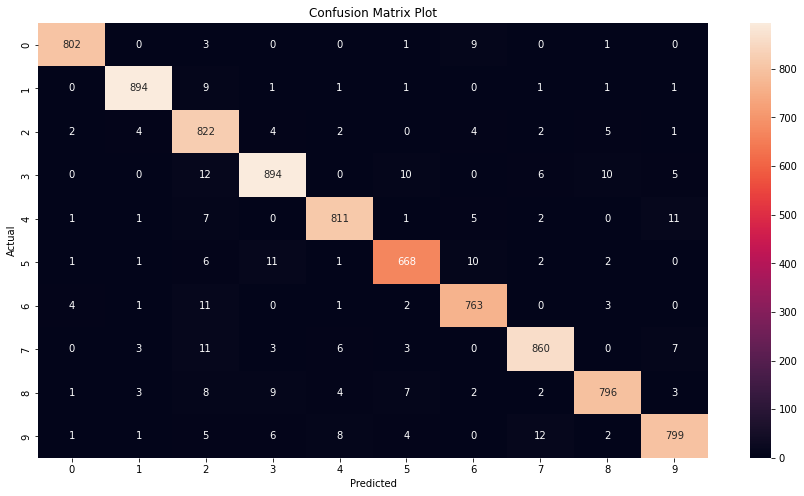

In [132]:
plt.figure(figsize=(15,8))
sns.heatmap(conf_m, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Plot")

In [133]:
# akurasi per setiap digit
dig_accuracy = np.arange(11).astype('float64')

for i in range(10) :
    dig_accuracy[i] = conf_m[i,i] / sum(conf_m[i]) * 100
    dig_accuracy[i] = round(dig_accuracy[i], 2)

#akurasi keseluruhan
dig_accuracy[10] = round(accuracy_score(y_test, y_pred) *100, 2)
dig_accuracy

array([98.28, 98.35, 97.16, 95.41, 96.66, 95.16, 97.2 , 96.3 , 95.33,
       95.35, 96.54])

In [134]:
df_accuracy = pd.DataFrame({"Label":[0,1,2,3,4,5,6,7,8,9,"Total"], "Accuracy":dig_accuracy}).set_index("Label")

df_accuracy

,Accuracy
Label,
0,98.28
1,98.35
2,97.16
3,95.41
4,96.66
5,95.16
6,97.20
7,96.30
8,95.33


## Kesimpulan : Akurasi setiap digit berada diatas 95% dan akurasi keseluruhan sebesar 96%. 

In [136]:
# create a sample and get sample

import cv2

# def save_sample():
#     X_sample = scaler.inverse_transform(X_test)
#     for i in range(10):
#         index = np.where(y_test == i)[0]
#         for j in range(10):
#             cv2.imwrite('dataset/sample/'+str(i)+'-'+str(j)+'.png', X_sample[index[j]].reshape((28,28)))
            
def get_sample(digit=0, number=None):
    if number is None:
        number = np.random.randint(0, 10, 1)[0]
    sourc = 'dataset/sample/'+ str(digit)+ '-'+ str(number)+ '.png'
    print(sourc)
    img = cv2.imread(sourc)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

# get_sample(digit=1, number=1)

dataset/sample/5-6.png


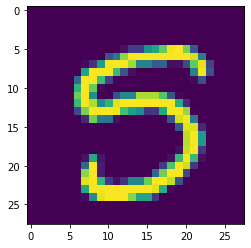

In [203]:
select = input("Masukkan digit yang ingin diprediksi :")
sample = get_sample(digit=select)
plt.imshow(sample)

In [204]:
sample = sample.flatten()
sample = sample.reshape(1,-1)
sample = scaler.transform(sample)

classes = model.predict(sample)
print("Hasil Prediksi : ", classes[0])

Hasil Prediksi :  5
